# Problem *3.16 - Giordano

### Problem Statement:

Investigate how a strange attractor is altered by small changes in one of the pendulum parameters. Begin by calculating the strange attractor in figure 3.9. Then change either the drive amplitude or drive frequency by a small amount and observe the changes in the attractor.

### Problem at hand

I will be solving this differential equation

$$\ddot{\theta} = - \frac{g}{l} sin(\theta) - q \dot{\theta} + \frac{a_D}{l} \sin{\Omega_D t}$$

which is a rigid pendulum being driven with an oscillating linear acceleration of magnitude $a_D$ and angular frequency $\Omega_D$. To convert $a_D$ to angular acceleration, I simply divide by $l$.

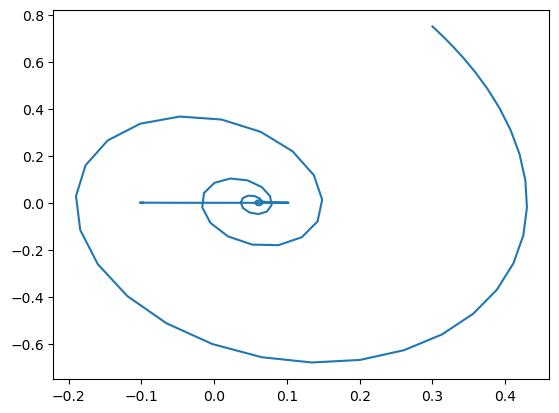

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi as π

# Define the constants
g = 9.8
l = 2.0
dt = 1e-3
q = 0.9
aD = 0.5
Ω = 0.1

# Define initial conditions
ω = 0.75
θ = 0.3

# Set them into an array
r = np.array([ω, θ])

# Make the lists to plot by redefining θ and ω as lists
θ, ω = [θ], [ω]

# Set time to 0.0 seconds
t = 0.0

α = lambda ω, θ, t: - g / l * np.sin(θ) - q * ω + aD * np.sin(Ω * t)

def f(r, Δt):
    return np.array([
        α(r[0], r[1], t) * Δt,
        r[0] * Δt
    ])

def RK2(r, Δt):
    k1 = f(r, Δt)
    k2 = f(r + Δt * k1 / 2, t + Δt / 2)
    return r + Δt / 2 * (k1 + k2)

while t < 50.0:
    r = RK2(r, dt)
    ω.append(r[0])
    θ.append(r[1])
    t += dt

n = 100
    
plt.plot(θ[::n], ω[::n])
plt.show()